In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.dpi'] = 300

In [3]:
norman = sc.read_h5ad('norman_normed.h5ad')
# replogle_k562 = sc.read_h5ad('replogle_k562_normed.h5ad')
# replogle_rpe1 = sc.read_h5ad('replogle_rpe1_normed.h5ad')

In [4]:
norman_qc = sc.pp.calculate_qc_metrics(norman, inplace=False)
# replogle_k562_qc = sc.pp.calculate_qc_metrics(replogle_k562, inplace=False)
# replogle_rpe1_qc = sc.pp.calculate_qc_metrics(replogle_rpe1, inplace=False)

In [5]:
gene_stats_norman = norman_qc[0]
cell_stats_norman = norman_qc[1]
cell_stats_norman

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
index,,,,,,
ENSG00000243485,29,0.000169,0.000169,99.973978,18.842470,2.987825
ENSG00000237613,0,0.000000,0.000000,100.000000,0.000000,0.000000
ENSG00000186092,0,0.000000,0.000000,100.000000,0.000000,0.000000
ENSG00000238009,265,0.001647,0.001646,99.762215,183.560394,5.217977
ENSG00000239945,10,0.000076,0.000076,99.991027,8.445427,2.245531
...,...,...,...,...,...,...
ENSG00000277856,0,0.000000,0.000000,100.000000,0.000000,0.000000
ENSG00000275063,0,0.000000,0.000000,100.000000,0.000000,0.000000
ENSG00000271254,10835,0.068001,0.065789,90.277715,7578.393066,8.933188


In [6]:
data_genes = pd.concat([
    pd.DataFrame({'dataset': 'norman', 'n_genes': norman_qc[0]['n_genes_by_counts']})
])

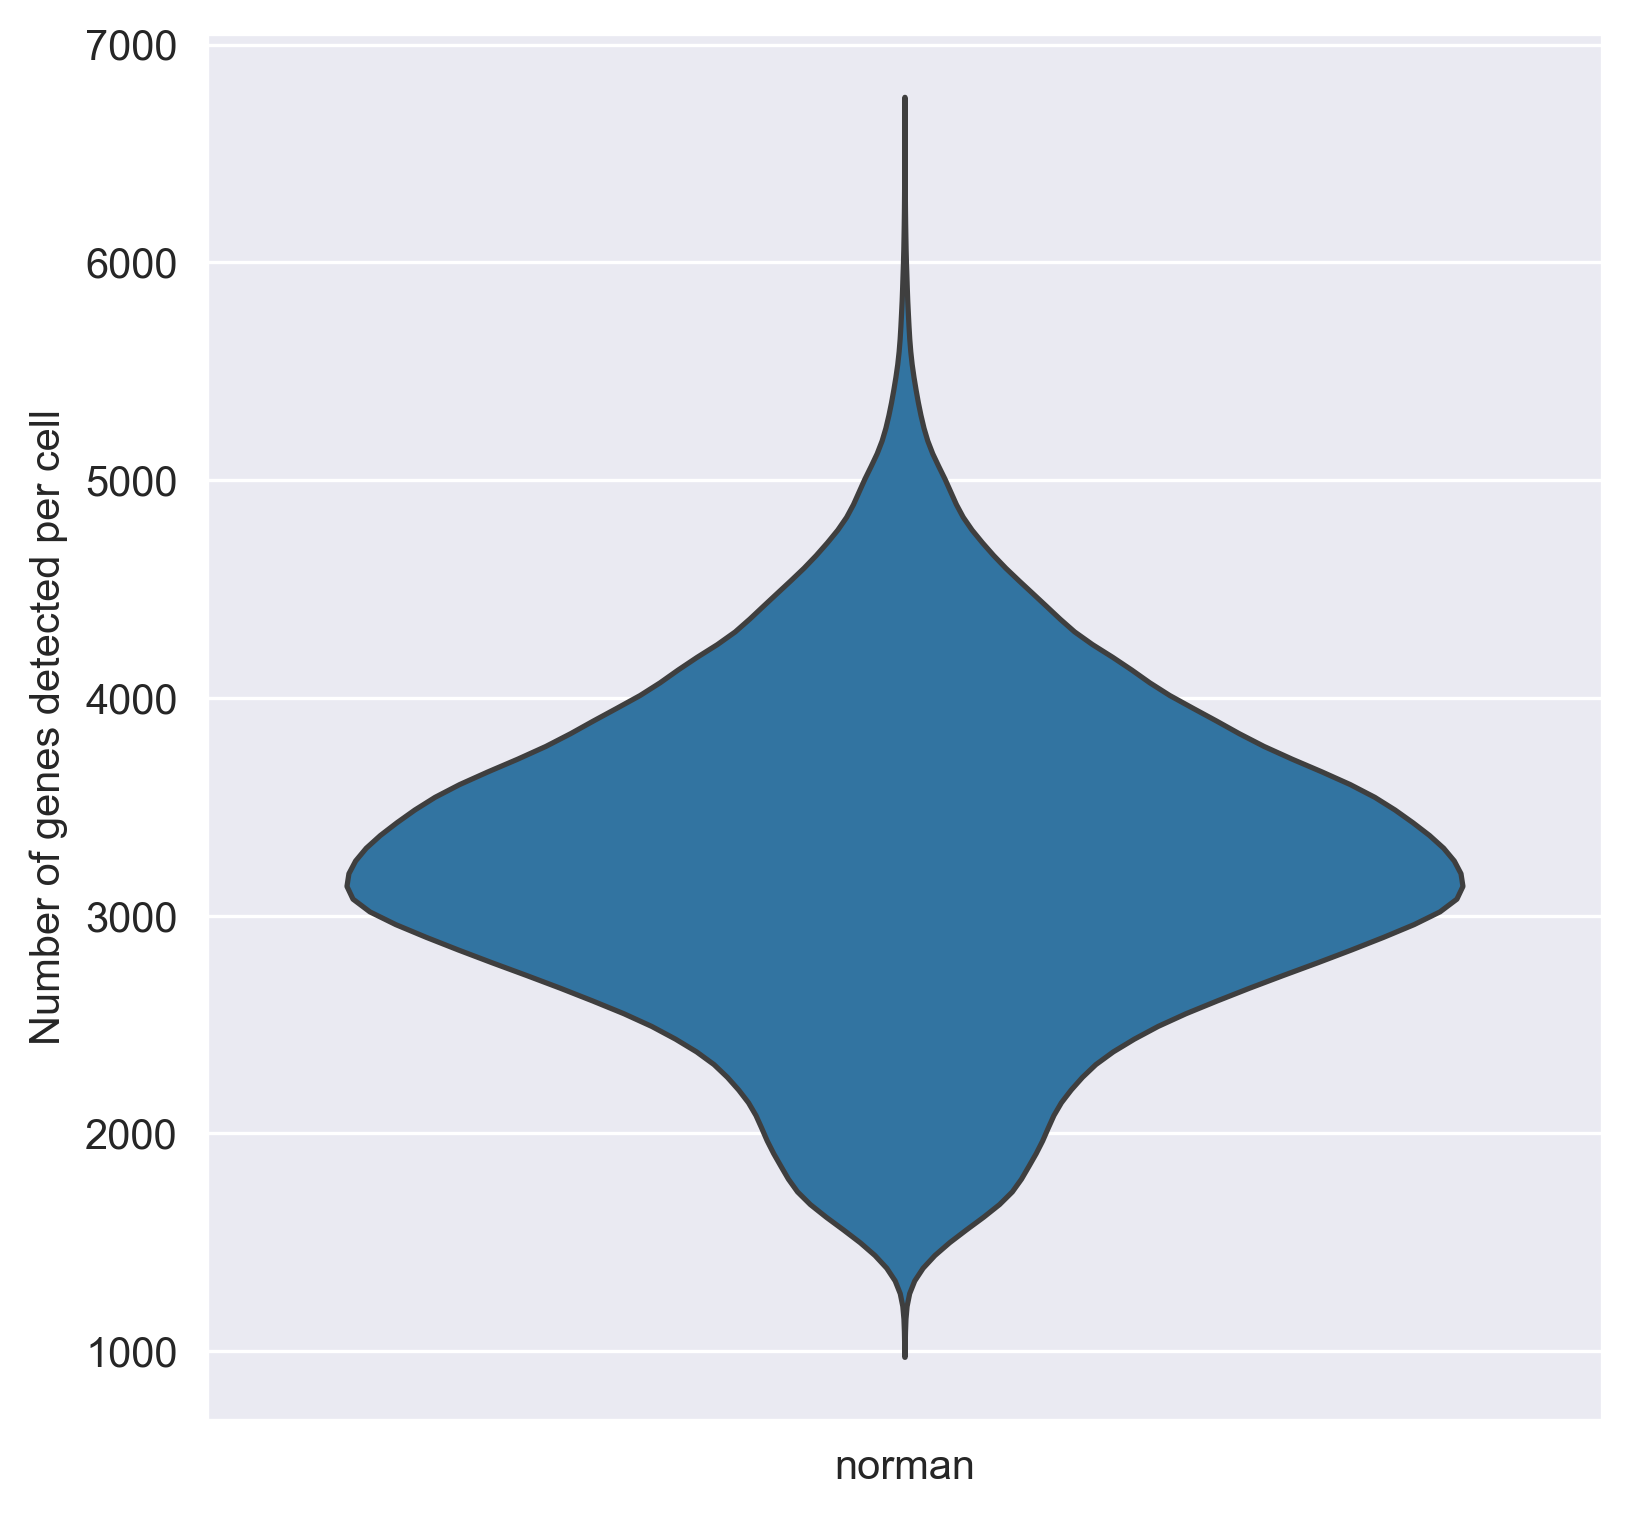

In [32]:
plt.figure(figsize=(6, 6))
sns.violinplot(x='dataset', y='n_genes', data=data_genes, inner=None, cut=0)
plt.ylabel('Number of genes detected per cell')
plt.xlabel("")
plt.savefig("n_genes_violinplot_norman.pdf")

In [9]:
data_cells = pd.concat([
    pd.DataFrame({'dataset': 'norman', 'n_counts': norman_qc[1]['n_cells_by_counts']})
])

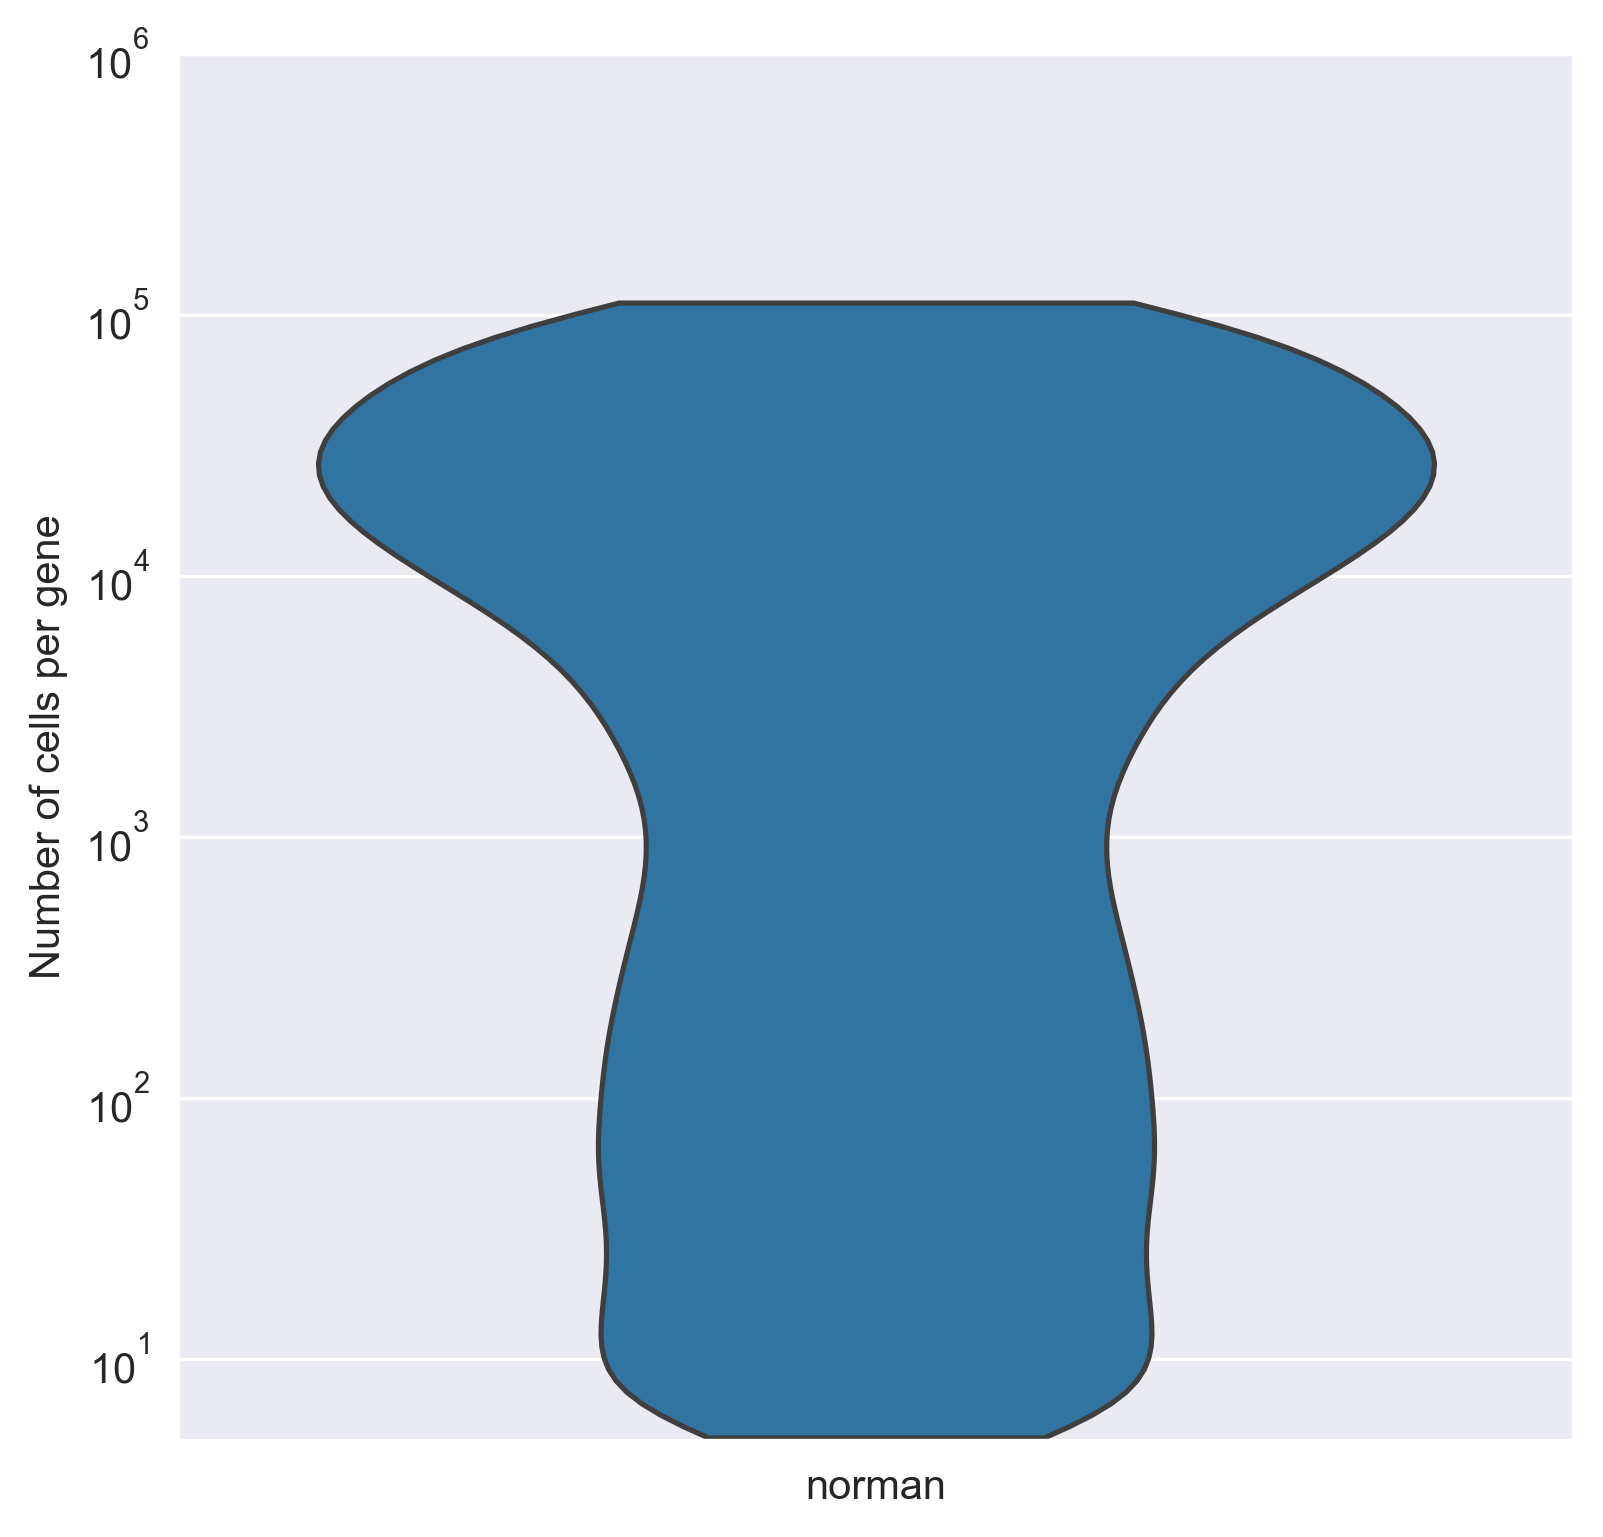

In [38]:
filtered_data_cells = data_cells.loc[data_cells['n_counts'] >= 5]

plt.figure(figsize=(6, 6))
# sns.boxplot(x='dataset', y='n_counts', data=filtered_data_cells, showfliers=False)
sns.violinplot(x='dataset', y='n_counts', data=filtered_data_cells, cut=0, log_scale=True, inner=None)
plt.ylabel('Number of cells per gene')
plt.yscale('log')
plt.ylim(4.9, 1e6)
plt.xlabel("")
plt.savefig('n_counts_violinplot_norman.pdf')